In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img,img_to_array

folder = '/content/drive/MyDrive/DOCUMENTS/FACE_RECOGNITION/dataSets'
photos, labels = list(), list()
for file in listdir(folder):
  photo = load_img(folder+'/'+file, target_size=(150,150))
  photo = img_to_array(photo)
  output = int(file.split('_')[1])  #tach lay so id từ ảnh (ví dụ: ảnh 'LUAN_0_50.JPG' thì số id là 0)
  photos.append(photo)              
  labels.append(output) 

photos = asarray(photos)                        #lưu dữ liệu ảnh dưới dạng mảng
labels = asarray(labels)                        #lưu dữ liệu phân loại dạng mảng
class_name = ['LUAN','DUY','TAN']               #tạo tên class tương ứng với dữ liệu phân loại
print(photos.shape, labels.shape, class_name)

save('/content/drive/MyDrive/DOCUMENTS/FACE_RECOGNITION/FILE_NPY/face_ANN_photos.npy',photos)
save('/content/drive/MyDrive/DOCUMENTS/FACE_RECOGNITION/FILE_NPY/face_ANN_labels.npy',labels)

(561, 150, 150, 3) (561,) ['LUAN', 'DUY', 'TAN']


In [ ]:
print(labels)
print(class_name[1])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2
 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [ ]:
#import thu vien
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Activation,BatchNormalization, Dropout, LSTM, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.models import Sequential
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from tensorflow.keras.optimizers import RMSprop, SGD
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from sklearn.preprocessing import scale

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(photos, labels, test_size=0.25, random_state=0)   #tạo dữ liệu train 75% và test 25%
print(x_train.shape)
print(y_test.shape)

(420, 150, 150, 3)
(141,)


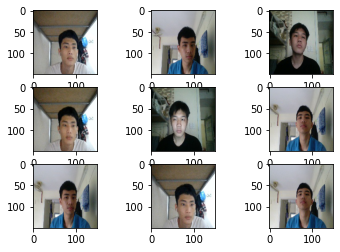

In [ ]:
#show 9 ảnh đầu tiên trong tập dữ liệu train        #áo trắng: LUAN, #áo đen: DUY, #áo xanh: TAN
x_train_show = x_train.astype(int)            
import matplotlib.pyplot as plt
from matplotlib.image import imread
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train_show[i])
plt.show()

In [ ]:
#xử lý dữ liệu
x_train = x_train.reshape(420, 67500)
x_test = x_test.reshape(141, 67500)
#x_train = x_train.astype('float32')
#x_test = x_test.astype('float32')
x_train/=255
x_test/=255
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

In [ ]:
#tạo model và train
model = Sequential()
model.add(Dense(1024, kernel_initializer='normal',activation='relu', input_shape = (67500, )))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(x_train,y_train, batch_size=64,epochs=10,verbose=1,validation_data = (x_test, y_test))
model.save('/content/drive/MyDrive/DOCUMENTS/FACE_RECOGNITION/MODEL_TRAINING/model_face_ANN.h5')

Epoch 1/10
7/7 [==============================] - 9s 1s/step - loss: 164.1176 - accuracy: 0.4238 - val_loss: 0.7606 - val_accuracy: 0.8369
Epoch 2/10
7/7 [==============================] - 7s 973ms/step - loss: 0.1150 - accuracy: 0.9762 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
7/7 [==============================] - 11s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
7/7 [==============================] - 7s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
7/7 [==============================] - 7s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
7/7 [==============================] - 7s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
7/7 [==============================] - 7s 970ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accur

In [ ]:
#load model
import keras
model = keras.models.load_model('/content/drive/MyDrive/DOCUMENTS/FACE_RECOGNITION/MODEL_TRAINING/model_face_ANN.h5')

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ',score[0])
print('test accuracy: ', score[1])

y_pred = model.predict(x_test)
print(y_pred.flatten())
print(y_test)

Test loss:  0.0
test accuracy:  1.0
[0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
 1.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 1.0000000e+00
 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
 1.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 1.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
 1.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000000e+00
 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 1.0000000e+00 0.0000000e+00 0.0000000e+0

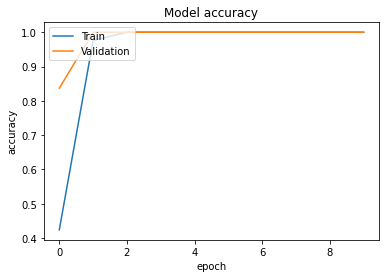

In [ ]:
#ve do thi do chinh xac
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc='upper left')

[[0. 0. 1.]]
This is TAN


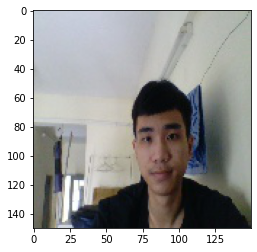

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from google.colab.patches import cv2_imshow

img = load_img('TAN_TEST2.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,67500)
img = img.astype('float32')
img/=255.0

a = np.argmax(model.predict(img), axis=-1)
print(model.predict(img))
print('This is',class_name[int(a)])

[[0.0000000e+00 1.0000000e+00 2.2285167e-34]]
This is DUY


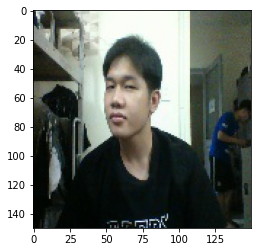

In [ ]:
img = load_img('DUY_TEST1.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,67500)
img = img.astype('float32')
img/=255.0

a = np.argmax(model.predict(img), axis=-1)
print(model.predict(img))
print('This is',class_name[int(a)])

[[1. 0. 0.]]
This is LUAN


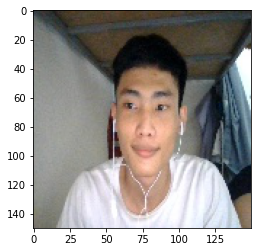

In [ ]:
img = load_img('LUAN_TEST1.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,67500)
img = img.astype('float32')
img/=255.0

a = np.argmax(model.predict(img), axis=-1)
print(model.predict(img))
print('This is',class_name[int(a)])